# Проект "Статистический анализ данных"
____

## Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
### Описание тарифов
#### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей  
    
#### Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей
____

### Описание данных
**Таблица `users` (информация о пользователях):**
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tariff` — название тарифного плана

**Таблица calls (информация о звонках):**
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
____

### Структура проекта
<a href='#section1'></a>
1. [Первичный осмотр данных](#section1)
<a href='#section2'></a>
2. [Предобработка данных](#section2)  
    * Приведение данных к нужным типам;
    * Исправление ошибок в данных. 
    > Обратите внимание, что длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки. Обрабатывать ли эти нулевые значения, решать вам — оцените, как их отсутствие повлияет на результаты анализа.
    * Подсчёт характеристик для каждого пользователя:
        * Количество сделанных звонков и израсходованных минут разговора по месяцам;
        * Количество отправленных сообщений по месяцам;
        * Объём израсходованного интернет-трафика по месяцам;
        * Помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).
<a href='#section3'></a>
3. [Статистический анализ данных](#section3)
    * Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
    * Посчёт среднего количества, дисперсии и стандартного отклонения.
    * Построение гистограмм. Описание распределений.
<a href='#section4'></a>
4. [Проверка гипотез](#section4)
   > Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается;  
   
   > Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
<a href='#section5'></a>
5. [Выводы исследования](#section5)
_____
_____

<a id='section1'></a>
## 1. Первичный осмотр данных

In [1]:
!pip install seaborn

In [2]:
from scipy import stats as st
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Init.
path = '/datasets/'
calls = pd.read_csv(path + 'calls.csv')
internet = pd.read_csv(path + 'internet.csv')
messages = pd.read_csv(path + 'messages.csv')
tariffs = pd.read_csv(path + 'tariffs.csv')
users = pd.read_csv(path + 'users.csv')
df_list = [calls, internet, messages, tariffs, users]

In [4]:
# First look.
hatched_line = '\n' + 100*'-' + '\n'
bold_line = 100*'—'
for df in df_list:
    print(bold_line, '\n', bold_line, sep='')
    print(
        df.info(), hatched_line,
        'HEAD:\n', df.head(), hatched_line,
        'DESCRIBE:\n', df.describe(), hatched_line,
        'NaNs percent:\n', (df.isna().sum() / df.shape[0] * 100).round(2).sort_values(),
        'Duplicates:\n', df.duplicated().sum(),
        sep=''
    )

————————————————————————————————————————————————————————————————————————————————————————————————————
————————————————————————————————————————————————————————————————————————————————————————————————————
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
----------------------------------------------------------------------------------------------------
HEAD:
       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000
----------------------------------------------------------------------------------------------------
DESCRIBE:
            d

**Выводы:**  
Проблемы для исправления в таблице ниже: *Параметр/Набор данных*.

|Parameter / DataFrame | Calls | Internet | Messages | Tariffs| Users |
|  :---:   | :---: |  :---:   |   :---:  |  :---: | :---: | 
| **Null/NaNs** | — | — | — | — | **`Churn_date: 92.8%`** |
| **Types** | **`Id`** to `integer`,  **`Call_date`** to `datetime` | **`Id`** to `integer`, **`Session_date`** to `datetime`  | — | — | **`Churn_date`** to `datetime`|
| **Duplicates** | — | — | — | — | — |
| **Smth special** | **`duration`** == 0  | **`Unnamed`** same as Index. Drop. | — | — | — |

____
____

<a id='section2'></a>
## 2. Предобработка данных

In [5]:
# Замена типов данных.
calls['id'] = calls['id'].astype('int64')
calls['call_date'] = pd.to_datetime(calls['call_date'])
# ---
internet['id'] = internet['id'].astype('int64')
internet['session_date'] = pd.to_datetime(internet['session_date'])
# ---
messages['message_date'] = pd.to_datetime(messages['message_date'])
# ---
users['churn_date'] = pd.to_datetime(users['churn_date'])

In [6]:
# Проверка.
calls.info(), internet.info(), messages.info(), users.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null int64
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 6.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null int64
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 5.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory us

In [7]:
# Избавляемся от 'Unnamed: 0' == internet.index
internet = internet.drop(axis="columns", columns='Unnamed: 0')

In [8]:
# В тарифах речь идёт про дополнительные Гб интернета => добавим поле с Гб.
internet['gb_used'] = (internet['mb_used'] / 1024).round(2)

In [9]:
# Проверка.
internet.head()

,id,mb_used,session_date,user_id,gb_used
0,10000,112.95,2018-11-25,1000,0.11
1,10001,1052.81,2018-09-07,1000,1.03
2,10002,1197.26,2018-06-25,1000,1.17
3,10003,550.27,2018-08-22,1000,0.54
4,10004,302.56,2018-09-24,1000,0.30


In [10]:
# Обработка duration == 0 в calls.
zero_duration_calls = calls.query('duration == 0')
print('Доля пропущенных звонков: {:.2%}'.format(len(zero_duration_calls) / len(calls)))

Доля пропущенных звонков: 19.55%


In [11]:
calls = calls.query('duration != 0').copy()

Доля пропущенных звонков `19.55%`. Почти пятая часть.  
Поскольку полученное описание тарифного плана не регулирует стоимость пропущенных звонков, (*и вряд ли должно;),  клиент не несёт ответственность за соверщённый ему звонок, пока не взял трубку*), оставим эти данные отдельно в `zero_duration_calls` и сосредоточимся на принятых звонках)  
____

**Подсчёт характеристик для каждого пользователя:**  
    * Количество сделанных звонков и израсходованных минут разговора по месяцам;  
    * Количество отправленных сообщений по месяцам;  
    * Объём израсходованного интернет-трафика по месяцам;  
    * Помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [12]:
# Округляем данные вверх, согласно указаниям заказчика.
calls['duration_round_up'] = np.ceil(calls['duration'])
calls.head()

,id,call_date,duration,user_id,duration_round_up
2,10002,2018-06-11,2.85,1000,3.0
3,10003,2018-09-21,13.80,1000,14.0
4,10004,2018-12-15,5.18,1000,6.0
7,10007,2018-08-22,18.31,1000,19.0
8,10008,2018-09-15,18.44,1000,19.0


In [13]:
# Выделяем номер месяца.
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month
calls.head(), internet.head(), messages.head()

(      id  call_date  duration  user_id  duration_round_up  month
 2  10002 2018-06-11      2.85     1000                3.0      6
 3  10003 2018-09-21     13.80     1000               14.0      9
 4  10004 2018-12-15      5.18     1000                6.0     12
 7  10007 2018-08-22     18.31     1000               19.0      8
 8  10008 2018-09-15     18.44     1000               19.0      9,
       id  mb_used session_date  user_id  gb_used  month
 0  10000   112.95   2018-11-25     1000     0.11     11
 1  10001  1052.81   2018-09-07     1000     1.03      9
 2  10002  1197.26   2018-06-25     1000     1.17      6
 3  10003   550.27   2018-08-22     1000     0.54      8
 4  10004   302.56   2018-09-24     1000     0.30      9,
        id message_date  user_id  month
 0  1000_0   2018-06-27     1000      6
 1  1000_1   2018-10-08     1000     10
 2  1000_2   2018-08-04     1000      8
 3  1000_3   2018-06-16     1000      6
 4  1000_4   2018-12-05     1000     12)

Очевидно, что самым интересным является последний пункт (прибыль).
По этой причине организуем такой порядок действий.
1. Выделим требующие подсчётов таблицы по парам:  
    * Клиент - Звонки (количество, минуты);  
    * Клиент - Сообщения (количество);  
    * Клиент - Интернет (Гб использовано);  
*Все пары с разрезе по месяцам.*  

2. Создадим для каждой пары сводную таблицу, а потом сольём их в одну по `user_id`.

3. Докинем к общей таблицу с указанием тарифа и города. 

4. Посчитаем выручку с клиента.

In [14]:
slice_users = (calls
               .merge(
                   users[['user_id', 'tariff', 'city']], 
                   on='user_id'
               )
)
slice_users.head()

,id,call_date,duration,user_id,duration_round_up,month,tariff,city
0,10002,2018-06-11,2.85,1000,3.0,6,ultra,Краснодар
1,10003,2018-09-21,13.80,1000,14.0,9,ultra,Краснодар
2,10004,2018-12-15,5.18,1000,6.0,12,ultra,Краснодар
3,10007,2018-08-22,18.31,1000,19.0,8,ultra,Краснодар
4,10008,2018-09-15,18.44,1000,19.0,9,ultra,Краснодар


In [15]:
# Таблица Клиент-Звонки.
users_calls = calls.pivot_table(
    index = ['user_id', 'month'], 
    values = 'duration_round_up', 
    aggfunc= ['count', 'sum']
)
users_calls.head(10)

count               sum
              duration_round_up duration_round_up
user_id month                                    
1000    5                    17             159.0
        6                    28             172.0
        7                    41             340.0
        8                    42             408.0
        9                    46             466.0
        10                   44             350.0
        11                   37             338.0
        12                   38             333.0
1001    11                   45             430.0
        12                   47             414.0

In [16]:
# Таблица Клиент-Сообщения.
users_messages = messages.pivot_table(
    index = ['user_id', 'month'], 
    values = 'id', 
    aggfunc= ['count']
)
users_messages.head(10)

count
                 id
user_id month      
1000    5        22
        6        60
        7        75
        8        81
        9        57
        10       73
        11       58
        12       70
1002    6         4
        7        11

In [17]:
# Таблица Клиент-Интернет.
users_internet = internet.pivot_table(
    index = ['user_id', 'month'], 
    values = 'gb_used', 
    aggfunc= ['sum']
)
users_internet.head(10)

sum
              gb_used
user_id month        
1000    5        2.19
        6       22.68
        7       13.71
        8       13.74
        9       14.25
        10      14.36
        11      14.39
        12       9.56
1001    11      17.98
        12      13.71

In [18]:
# Cливаем таблицы пар по user_id и month.
merge_pivot_users = (users_calls
                     .merge(
                         users_messages,
                         on = ['user_id', 'month']
                     )
                     .merge(
                         users_internet,
                         on = ['user_id', 'month']
                     )
                     .set_axis(
                         labels = [
                             'call_numbers',
                             'call_minutes',
                             'message_numbers',
                             'gb_used'
                         ],
                         axis = "columns",
                         inplace = False
                     )
)
merge_pivot_users.head()

call_numbers  call_minutes  message_numbers  gb_used
user_id month                                                      
1000    5                17         159.0               22     2.19
        6                28         172.0               60    22.68
        7                41         340.0               75    13.71
        8                42         408.0               81    13.74
        9                46         466.0               57    14.25

In [19]:
# Добавляем параментры города и тарифа к прошлой таблице по user_id.
main_pivot = (merge_pivot_users
             .join(
                 users[['user_id', 'tariff', 'city']].set_index('user_id'), 
                 on = ['user_id'] , how='left')
             .reset_index()
             .fillna(0)
)
main_pivot.head()

,user_id,month,call_numbers,call_minutes,message_numbers,gb_used,tariff,city
0,1000,5,17,159.0,22,2.19,ultra,Краснодар
1,1000,6,28,172.0,60,22.68,ultra,Краснодар
2,1000,7,41,340.0,75,13.71,ultra,Краснодар
3,1000,8,42,408.0,81,13.74,ultra,Краснодар
4,1000,9,46,466.0,57,14.25,ultra,Краснодар


#### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей  
    
#### Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

In [20]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [21]:
def get_revenue(df):
    tax_series = df['tariff']
    smart = tariffs.loc[0, :]
    ultra = tariffs.loc[1, :]
    if tax_series == 'smart':
        extra_minutes = df['call_minutes'] - smart['minutes_included']
        if extra_minutes > 0 :
            calls_cost =  extra_minutes * smart['rub_per_minute']
        else :
            calls_cost = 0
        extra_messages = df['message_numbers'] - smart['messages_included']
        if extra_messages > 0:
            messages_cost = extra_messages * smart['rub_per_message']
        else:
            messages_cost = 0
        extra_gb = df['gb_used'] - (smart['mb_per_month_included'] / 1024)
        if extra_gb > 0:
            gbs_cost = extra_gb * smart['rub_per_gb']
        else:
            gbs_cost = 0
            
        return (smart['rub_monthly_fee'] + calls_cost + messages_cost + gbs_cost)
    
    elif tax_series == 'ultra':
        extra_minutes = df['call_minutes'] - ultra['minutes_included']
        if extra_minutes > 0:
            calls_cost =  extra_minutes * ultra['rub_per_minute']
        else :
            calls_cost = 0
        extra_messages = df['message_numbers'] - ultra['messages_included']
        if extra_messages > 0:
            messages_cost = extra_messages * ultra['rub_per_message']
        else:
            messages_cost = 0
        extra_gb = df['gb_used'] - (ultra['mb_per_month_included'] / 1024)
        if extra_gb > 0:
            gbs_cost = extra_gb * ultra['rub_per_gb']
        else:
            gbs_cost = 0
        
        return (ultra['rub_monthly_fee'] + calls_cost + messages_cost + gbs_cost)
    
    else:
        raise ValueError('No such tax for that user!')

In [22]:
main_pivot['revenue_by_month'] = main_pivot.apply(get_revenue, axis=1)
main_pivot.head()

,user_id,month,call_numbers,call_minutes,message_numbers,gb_used,tariff,city,revenue_by_month
0,1000,5,17,159.0,22,2.19,ultra,Краснодар,1950.0
1,1000,6,28,172.0,60,22.68,ultra,Краснодар,1950.0
2,1000,7,41,340.0,75,13.71,ultra,Краснодар,1950.0
3,1000,8,42,408.0,81,13.74,ultra,Краснодар,1950.0
4,1000,9,46,466.0,57,14.25,ultra,Краснодар,1950.0


**Результат:**  
Произведён подсчёт следующих характеристик для каждого из пользователей в таблице `main_pivot`:
* Количество сделанных звонков и израсходованных минут разговора по месяцам;
* Количество отправленных сообщений по месяцам;
* Объём израсходованного интернет-трафика по месяцам;
* Помесячная выручка с каждого пользователя.

____
____

<a id='section3'></a>
## 3. Статистический анализ данных

* Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
* Посчёт среднего количества, дисперсии и стандартного отклонения.
* Построение гистограмм. Описание распределений.

In [23]:
# Не понял как передать параметр 'ddof=1' в np.var и np.std без непосредственного их вызова 'func(ddof=1)', потому что
# aggfunc в pivot_table принимает только имя ф-ции (список имён) и вызывает на месте. 
# Пробовал что-то из func(default, {'ddof':1}), однако не получилось.
# => Переопределил тут.
def var(a):
    return np.var(a, ddof=1)


def std(a):
    return np.std(a, ddof=1)

In [24]:
tariff_groupby = (
    main_pivot
        .pivot_table(
            index = ['tariff'],
            values = ['call_minutes', 'message_numbers', 'gb_used', 'revenue_by_month'], 
            aggfunc = [np.mean, var, std]
        )
        .round(1)
# Транспонируем. Теперь тарифы - столбцы.
        .transpose()
# Меняем уровни мультииндексов между статистиками и values
        .swaplevel()
# Группируем по values
        .sort_index()
);
tariff_groupby

tariff                    smart    ultra
call_minutes     mean     421.5    559.1
                 std      187.3    310.5
                 var    35087.3  96399.8
gb_used          mean      15.9     19.1
                 std        5.7      9.4
                 var       32.0     88.7
message_numbers  mean      38.8     61.3
                 std       26.8     44.5
                 var      719.5   1983.6
revenue_by_month mean    1231.7   2040.6
                 std      790.6    314.8
                 var   625026.1  99104.3

In [25]:
# Разделяем данные по тарифам для построение гистограмм.
smart = main_pivot.query('tariff == "smart"')
ultra = main_pivot.query('tariff == "ultra"')

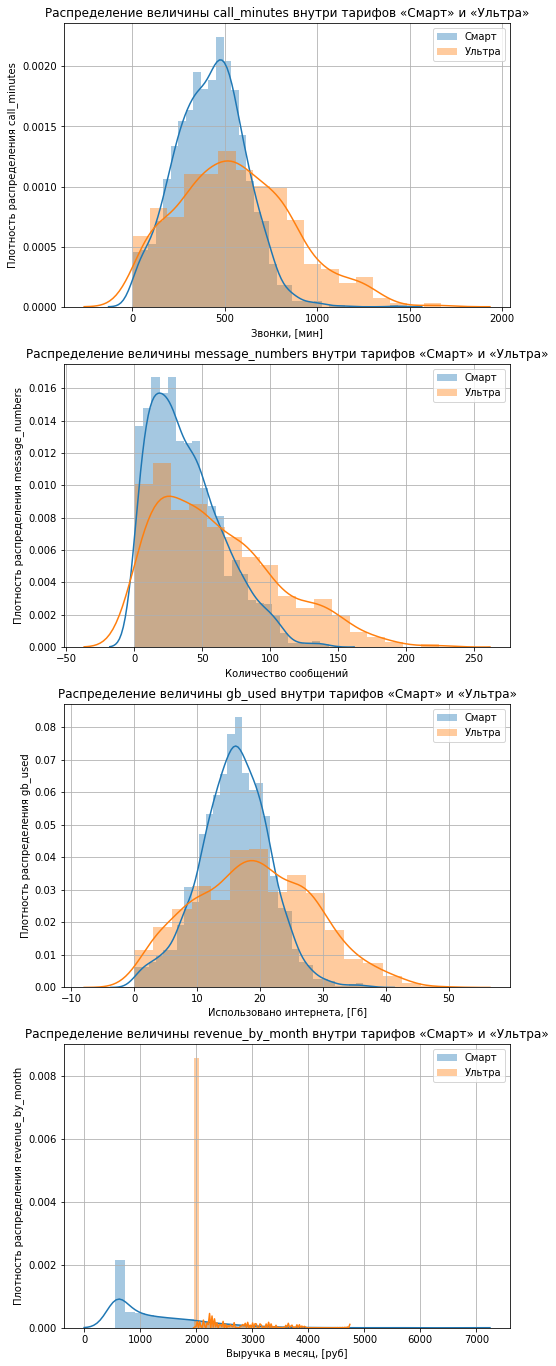

In [26]:
# Визуализируем данные.
plots_data_labels = {
    'Звонки, [мин]' : 'call_minutes',
    'Количество сообщений' : 'message_numbers',
    'Использовано интернета, [Гб]' : 'gb_used',
    'Выручка в месяц, [руб]' : 'revenue_by_month'
}
fig, ax = plt.subplots(4, figsize=(8, 24))
for num, label in enumerate(plots_data_labels.items()):
    sns.distplot(smart[label[1]], ax=ax[num], kde=True, label='Смарт');
    sns.distplot(ultra[label[1]], ax=ax[num], kde=True, label='Ультра');
    ax[num].set_title('Распределение величины %s внутри тарифов «Смарт» и «Ультра»'%label[1])
    ax[num].set_ylabel('Плотность распределения %s'%label[1])
    ax[num].set_xlabel(label[0])
    ax[num].grid()
    ax[num].legend()

#### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей  
    
#### Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

**Выводы:**  
1. **Тариф «Смарт»:**  
    * `Звонки` - пользователи тарифа в среднем используют `421.5` минут, что меньше количества, включённого в тариф. Однако, судя по диапазону нормального распределения, потребление колеблется в интервале `[234, 609]` минут. *Часть пользователей докупает минуты*.  
    * `Интернет` - в среднем используется `15.9` Гб интернет трафика, что больше заявленных в тарифе. Диапазон использования - от `10` до `22` Гб интернета. *Пользователям зачастую не хватает Гб интернета внутри тарифа*.
    * `Сообщения` - в среднем отправляется `39` сообщений в диапазоне нормального распределения - `[12, 66]` сообщений. *Верхняя граница диапазона превышает тарифный план на `32%`*.  
**Общий вывод по тарифу:**  Тариф бесспорно прибыльный для компании, о чём свидетельствует средняя выручка в `1231.7` рублей в месяц с пользователя при базовой стоимости в `550` рублей. Однако видны явные минусы:
* Недостаток интернет трафика;
* Недостаток сообщений;
Средний пользователь, подключая тариф в `550` рублей, вряд ли рассчитывает получать счёт в 2 раза больше. Возможен отток клиентов. *По предоставленным данным (отсутствие маржинальности, характеристик пользователей, прочих предоставляемых услуг) рекомендуется корректировка условий тарифа*.  

2. **Тариф «Ультра»:**  
    * `Звонки` - пользователи тарифа в среднем используют `559.1` минут, что гораздо меньше количества, включённого в тариф. Однако, судя по диапазону нормального распределения, верхняя граница потребления минут равна `869,6`. *Большая часть пользователей довольны и тратят меньше предоставленного*.  
    * `Интернет` - в среднем используется `19.1` Гб интернет трафика, что больше заявленных в тарифе. Диапазон использования - от `10` до `29` Гб интернета. *Пользователь опять же остаётся в пределах допустимых значений тарифа*.
    * `Сообщения` - в среднем отправляется `61` сообщениe в диапазоне нормального распределения - `[17, 106]` сообщений. *Верхняя граница диапазона снова не превышает лимит тарифного плана по сообщениям*.  
**Общий вывод по тарифу:**  Тариф выгоден для компании и выгоден для пользователей, готовых за него платить. Большая часть пользоватей не перешагивает лимиты внутри тарифа => всегда остаётся на связи без дополнительных рассходов :), а компания расходует по факту меньше, чем заявляет изначально по тарифу. 
> «Мир. Дружба. Жвачка.»

____
____

<a id='section4'></a>
## 4. Проверка гипотез

In [27]:
# Гипотезы схожи между собой => одиннаковый метод проверки => питон же функциональный язык... даже в DataScience :)
def make_ttest_rel(x_1, x_2, alpha = 0.01):
    
    def get_mean_revenue(x_1, x_2):
        x_1_mean = x_1.pivot_table(
            index = ['month'],
            values = ['revenue_by_month']
        );
        x_2_mean = x_2.pivot_table(
            index = ['month'],
            values = ['revenue_by_month']
        );
        return x_1_mean, x_2_mean

    results = st.ttest_rel(*get_mean_revenue(x_1, x_2))
    print('p-value: ', results.pvalue)
    if (results.pvalue < alpha):
        return "Отвергаем нулевую гипотезу."
    else:
        return "Не отвергаем нулевую гипотезу."

____
> Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается.

Сформулируем наши дальнейшие действия.  

$H_0:$ *Средняя выручка по совокупности пользователей тарифа «Смарт» равна средней выручке по совокупности пользователей тарифа «Ультра»*.

$H_1:$ *Средняя выручка по совокупности пользователей тарифа «Смарт» отличается от средней выручки по совокупности пользователей тарифа «Ультра»*.

Проверять будем с помощью гипотезы о равенстве средних между двумя совокупностями.

In [28]:
# Разделяем данные по тарифам.
smart = main_pivot.query('tariff == "smart"')
ultra = main_pivot.query('tariff == "ultra"')

In [29]:
# Проверка.
make_ttest_rel(smart, ultra)

p-value:  [3.07836144e-09]


'Отвергаем нулевую гипотезу.'

**Результат:**  
Отвергаем нулевую гипотезу =>
> $H_1:$ Средняя выручка по совокупности пользователей тарифа «Смарт» отличается от средней выручки по совокупности пользователей тарифа «Ультра».
____

> Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Сформулируем наши дальнейшие действия.  

$H_0:$ *Средняя выручка по совокупности пользователей из Москвы отличается от средней выручки по совокупности пользователей из других регионов.*.

$H_1:$ *Средняя выручка по совокупности пользователей из Москвы **не** отличается от средней выручки по совокупности пользователей из других регионов.*.

Проверять будем с помощью гипотезы о равенстве средних между двумя совокупностями.

In [30]:
# Разделяем данные по принадлежности к Москве.
moscow = main_pivot.query('city == "Москва"')
not_moscow = main_pivot.query('city != "Москва"')

In [31]:
# Проверка.
make_ttest_rel(moscow, not_moscow)

p-value:  [0.03034311]


'Не отвергаем нулевую гипотезу.'

**Результат:**  
Не отвергаем нулевую гипотезу =>
> $H_0:$ *Средняя выручка по совокупности пользователей из Москвы отличается от средней выручки по совокупности пользователей из других регионов*.

____
____

<a id='section5'></a>
## 5. Выводы исследования

1. **Тариф «Смарт»:**  
    * `Звонки` - пользователи тарифа в среднем используют `421.5` минут, что меньше количества, включённого в тариф. Однако, судя по диапазону нормального распределения, потребление колеблется в интервале `[234, 609]` минут. *Часть пользователей докупает минуты*.  
    * `Интернет` - в среднем используется `15.9` Гб интернет трафика, что больше заявленных в тарифе. Диапазон использования - от `10` до `22` Гб интернета. *Пользователям зачастую не хватает Гб интернета внутри тарифа*.
    * `Сообщения` - в среднем отправляется `39` сообщений в диапазоне нормального распределения - `[12, 66]` сообщений. *Верхняя граница диапазона превышает тарифный план на `32%`*.  
**Общий вывод по тарифу:**  Тариф бесспорно прибыльный для компании, о чём свидетельствует средняя выручка в `1231.7` рублей в месяц с пользователя при базовой стоимости в `550` рублей. Однако видны явные минусы:
* Недостаток интернет трафика;
* Недостаток сообщений;
Средний пользователь, подключая тариф в `550` рублей, вряд ли рассчитывает получать счёт в 2 раза больше. Возможен отток клиентов. *По предоставленным данным (отсутствие маржинальности, характеристик пользователей, прочих предоставляемых услуг) рекомендуется корректировка условий тарифа*.  

2. **Тариф «Ультра»:**  
    * `Звонки` - пользователи тарифа в среднем используют `559.1` минут, что гораздо меньше количества, включённого в тариф. Однако, судя по диапазону нормального распределения, верхняя граница потребления минут равна `869,6`. *Большая часть пользователей довольны и тратят меньше предоставленного*.  
    * `Интернет` - в среднем используется `19.1` Гб интернет трафика, что больше заявленных в тарифе. Диапазон использования - от `10` до `29` Гб интернета. *Пользователь опять же остаётся в пределах допустимых значений тарифа*.
    * `Сообщения` - в среднем отправляется `61` сообщениe в диапазоне нормального распределения - `[17, 106]` сообщений. *Верхняя граница диапазона снова не превышает лимит тарифного плана по сообщениям*.  
**Общий вывод по тарифу:**  Тариф выгоден для компании и выгоден для пользователей, готовых за него платить. Большая часть пользоватей не перешагивает лимиты внутри тарифа => всегда остаётся на связи без дополнительных рассходов :), а компания расходует по факту меньше, чем заявляет изначально по тарифу. 

3. **Гипотезы:**
* Средняя выручка по совокупности пользователей тарифа «Смарт» отличается от средней выручки по совокупности пользователей тарифа «Ультра».
* Средняя выручка по совокупности пользователей из Москвы отличается от средней выручки по совокупности пользователей из других регионов..

____
____